In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

## Content Based Recommender - Movie Description Based Recommender

This model will look for similarity between movies. This is known as Content Based Filtering/Recommender because I will be using movie metadata to build it.

It will be based on movie "Overviews" and "Taglines"

Also, I will be using a subset of all the movies available due to limiting computing power.

### Cosine Similarity

I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

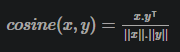

In [52]:
df = pd.read_csv('movies_final.csv')
df['description'] = df['description'].fillna('')
df = df.drop_duplicates(subset='title')
print(df.shape)

# Make DataFrame smaller
df = df.sample(n=27000)
print(df.shape)

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['description'])
print(f"tfidf_matrix.shape: , {tfidf_matrix.shape}")

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# We now have a pairwise cosine similarity matrix for all the movies in our dataset. 
# The next step is to write a function that returns the 5 most similar movies based on the cosine similarity score.

df = df.reset_index()
titles = df['title']
indices = pd.Series(df.index, index=df['title'])

def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# We're all set. Let's try and get the top recommendations for a few movies and see how good the recommendations are.

(42196, 13)
(27000, 13)
tfidf_matrix.shape: , (27000, 704117)


In [53]:
df.head()

,index,id,belongs_to_collection,budget,popularity,poster_path,release_date,revenue,title,vote_average,returns,production_companies,production_countries,description
0,105390,105390,NaN,0,1.291844,/llD80LjD4Ydrw4ktqkgjZVzddZu.jpg,1996-10-16,0,The Rolling Stones Rock and Roll Circus,7.4,0.0,NaN,NaN,The Rolling Stones Rock and Roll Circus is a f...
1,69044,69044,NaN,7677765,0.382908,/td8DkXlZtbte0slKC52udPIfD8m.jpg,2006-05-10,0,Les Aiguilles rouges,7.0,0.0,NaN,France,"September 1960: on a purely punitive basis, ei..."
2,108455,108455,Parent Trap Collection,0,0.161979,/lfDN8vZpfQS0eqxfuwHIMzdaVYJ.jpg,1989-04-09,0,Parent Trap III,3.8,0.0,NaN,NaN,"When Jeff plans to marry again, his triplet da..."
3,58148,58148,NaN,0,0.315696,/9TGmE1YMZWSCX9D2j32uJcVtobZ.jpg,2011-10-19,0,The Catechism Cataclysm,3.9,0.0,NaN,NaN,Father William Smoortser drops his bible into ...
4,30772,30772,NaN,0,2.390913,/pV4IiDPZEFJdrFWsdW9DTzPeEvz.jpg,2005-01-01,0,The Thing About My Folks,5.4,0.0,NaN,NaN,Ben's dad Sam shows up one night with a note f...


In [54]:
get_recommendations("Batman")

9260     Batman Beyond: Return of the Joker
12164                     Batman vs Dracula
22814                 The Dark Knight Rises
16498                 DC Showcase: Catwoman
14078      Batman Unlimited: Monster Mayhem
Name: title, dtype: object